<a href="https://colab.research.google.com/github/lrupp25/Data2000HW/blob/main/Copy_of_11_14_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Image Classification: Fashion MNIST

The Fashion MNIST dataset is a large freely available database of fashion images that is commonly used for training and testing various machine learning systems. Fashion-MNIST was intended to serve as a replacement for the original MNIST database for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

The dataset contains 70,000 28x28 grayscale images of fashion products from 10 categories from a dataset of Zalando article images, with 7,000 images per category. The training set consists of 60,000 images and the test set consists of 10,000 images. The dataset is commonly included in standard machine learning libraries. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Fashion_MNIST))

The classes are:

| Label | Description |
|-----|-----|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## Objective

The goal here is to simply build and fit the best convolutional neural network that you can to correctly classify these image instances. Describe your process and choices as you go, and include an evaluation of your model's performance.

Loading data, includes resizing data to be from 0-1 and dummy encoding y_train/y_test as one of the data sets was not dummy encoded and as a result prevented model from working.

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.


print(X_train.shape)
print(X_test.shape)

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Showing data, now a little messy looking due to dummy encoding

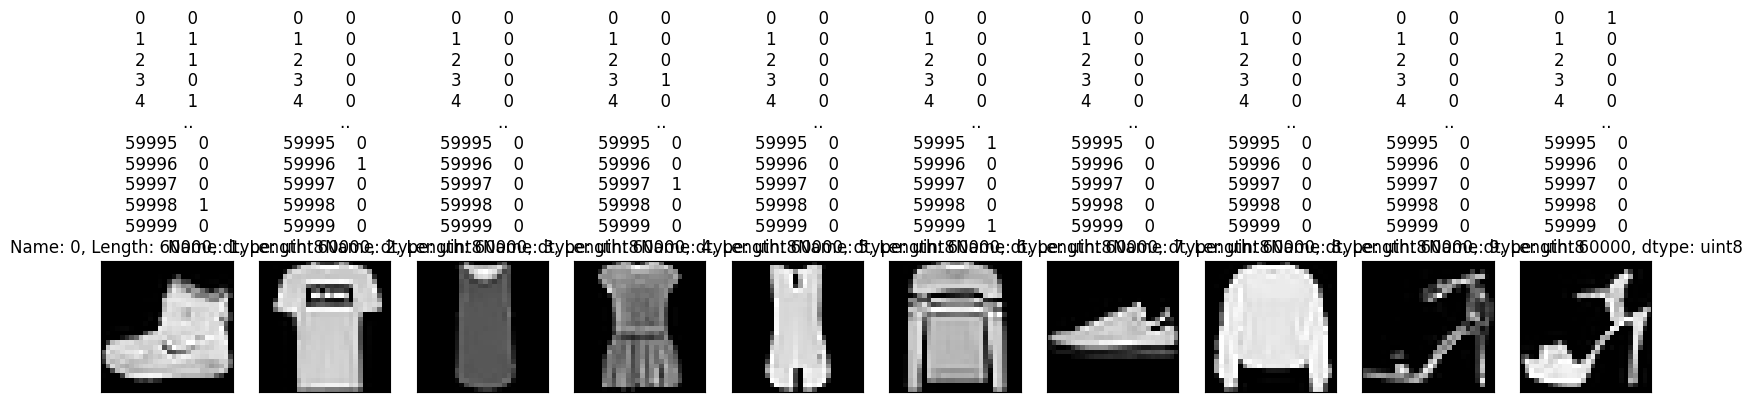

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'{y_train[i]}')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Creating the convulutional network. Starts with an input layer, going into a convolutional layer where it is filtered, a pooling layer to save on memory. Dropout layer to prevent model from memorizing data and actually refining the predictive model. Flatten to move data into "1 layer", to output layer.

Tried to see what creating extra layers would do, in this example for whatever reason made the model worse. Not sure exactly why, but, we carry on.

In [ ]:
input = tf.keras.layers.Input(shape = (28,28,1))
conv1 = layers.Conv2D(7, 2, activation = 'relu')(input) #0 for negative, to infinity for positive
pooling = layers.AveragePooling2D(2)(conv1) #takes avg value of pool, the
#dimension is the shape of your data, what are you trying to model?
#4 is the window length
#stride=1 as the default
dropout=tf.keras.layers.Dropout(0.4)(pooling)
#conv2 = tf.keras.layers.Conv2D(4, 2, activation='relu')(dropout)
#pooling2 = tf.keras.layers.AveragePooling2D(2)(conv2)
#dropout2 = tf.keras.layers.SpatialDropout2D(.4)(pooling2)
#40% of neurons will be set to 0(randomly)60% are active
flatten=tf.keras.layers.Flatten()(dropout)

dense=layers.Dense(100 ,activation ='relu')(flatten)

output = layers.Dense(10, activation='softmax')(dense)

Defining the model using input and output layers.

In [ ]:
model = tf.keras.Model(input, output)

Defining compilation of the model, chose categorical_crossentropy due to there being ten different (nonbinary) categorical outputs being predicted here

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)

Seeing the model structure

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 7)         35        
                                                                 
 average_pooling2d_8 (Avera  (None, 13, 13, 7)         0         
 gePooling2D)                                                    
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 7)         0         
                                                                 
 flatten_6 (Flatten)         (None, 1183)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               118400    
                                                           

Defining the model using the training data, using 10 epochs to make life easy.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5697 - categorical_accuracy: 0.7924 - val_loss: 0.4224 - val_categorical_accuracy: 0.8492
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4221 - categorical_accuracy: 0.8469 - val_loss: 0.3776 - val_categorical_accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3831 - categorical_accuracy: 0.8618 - val_loss: 0.3555 - val_categorical_accuracy: 0.8714
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3577 - categorical_accuracy: 0.8710 - val_loss: 0.3325 - val_categorical_accuracy: 0.8793
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3393 - categorical_accuracy: 0.8764 - val_loss: 0.3132 - val_categorical_accuracy: 0.8872
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3292 - categorical_accuracy: 0.8813 - val_loss: 0.3088 - val_categorical_accuracy:

Considerably good model since it is at a 90% accuracy on the test/validation data. When using more than one convolutional layer it seemed to sit at most at 80% (if it ran). I'm not sure why it did not work, but regardless I am more than satisfied with this 90% accuracy.